### **Proyecto Unsupervised Learning - Luis Alpizar**
- **Source**: 4Geeks
- **URL**: https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv
- **Goal**: Create a basic clustering model with K-Means

### Sistema de agrupación de casas

Clasificar casas según su la región en la que se encuentren y del ingreso medio.

### Paso 0: Importar librerias

In [52]:
import logging
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import (
    PCA,
    FastICA
)
from sklearn.cluster import KMeans
from sklearn.manifold import (
    MDS,
    TSNE
)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

logger = logging.getLogger()
logger.setLevel(logging.INFO)

### Paso 1: Carga del dataset

In [8]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Paso 2: Data preprocessing

In [13]:
df_baking = df_raw[['Latitude', 'Longitude', 'MedInc']].copy()
df_baking.columns = df_baking.columns.str.replace("(", "").str.replace(")", "").str.replace(" ", "_")
df_baking.columns = df_baking.columns.str.lower()
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   20640 non-null  float64
 1   longitude  20640 non-null  float64
 2   medinc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [14]:
df = df_baking.copy()
df.sample(10, random_state=2025)

,latitude,longitude,medinc
8651,33.86,-118.39,4.8971
3034,35.39,-119.12,4.5903
2918,35.36,-119.04,3.0435
12884,38.66,-121.34,1.9805
13325,34.06,-117.63,2.3636
2045,36.73,-119.73,1.4007
9331,37.97,-122.50,2.7273
16647,35.27,-120.65,4.2411
8892,34.02,-118.50,2.9934
18177,37.36,-122.00,8.6155


### Paso 3: Exploratory Data Analysis

In [21]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 2025)

In [22]:
X_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
latitude,16512.0,35.622521,2.134124,32.5400,33.9300,34.2500,37.71000,41.9500
longitude,16512.0,-119.560614,2.003636,-124.3500,-121.7900,-118.4900,-118.00000,-114.3100
medinc,16512.0,3.869547,1.898848,0.4999,2.5625,3.5334,4.75495,15.0001


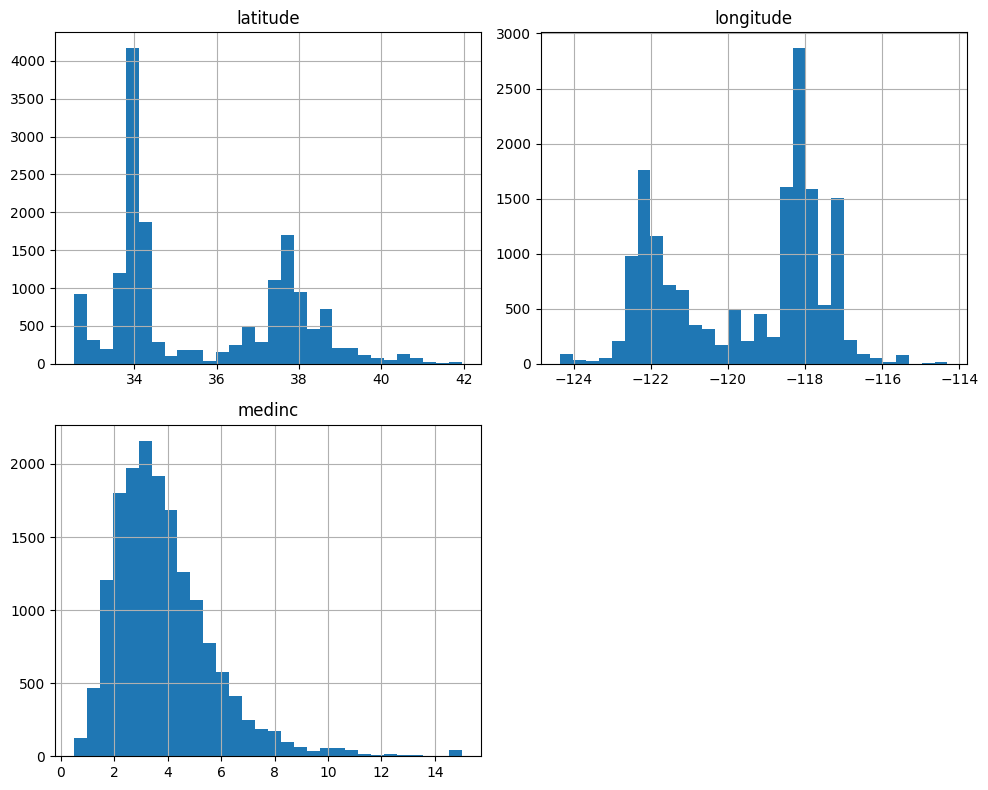

In [23]:
X_train.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

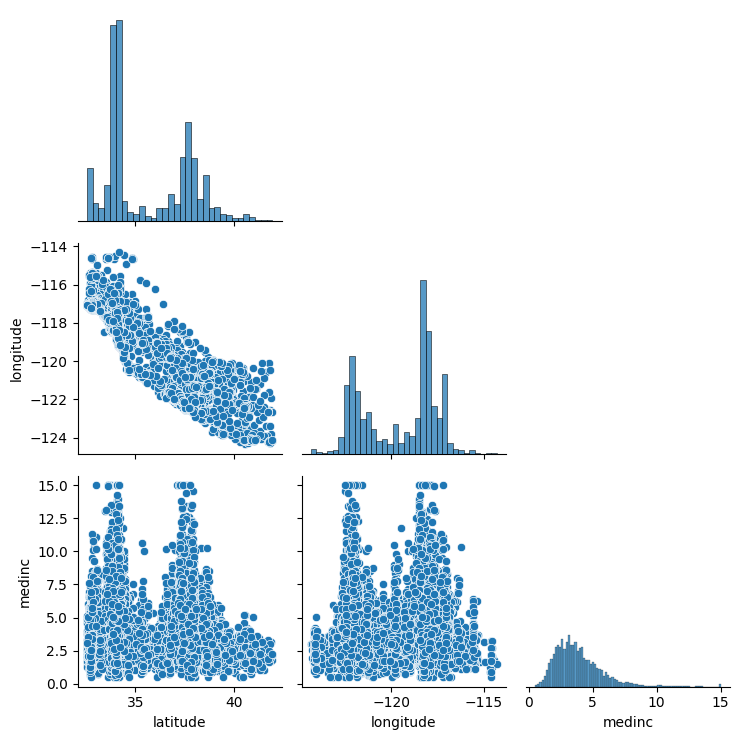

In [24]:
sns.pairplot(data=X_train, corner=True)
plt.tight_layout()
plt.show()

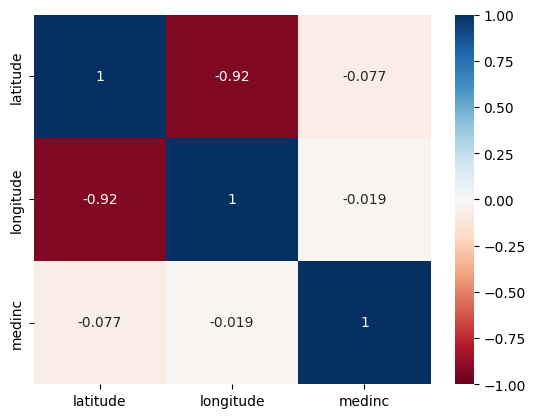

In [25]:
sns.heatmap(data=X_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

### Paso 4: Machine Learning

In [26]:
unsup_km = KMeans(n_clusters = 6, n_init = "auto", random_state = 2025)
unsup_km.fit(X_train)

KMeans(n_clusters=6, random_state=2025)

#### Clustering

Asignación de las etiquetas de clusters generadas por el modelo de K-Means a una nueva columna en el conjunto de datos de entrenamiento.

In [27]:
y_train = list(unsup_km.labels_)
X_train["cluster"] = y_train

#### Visulización

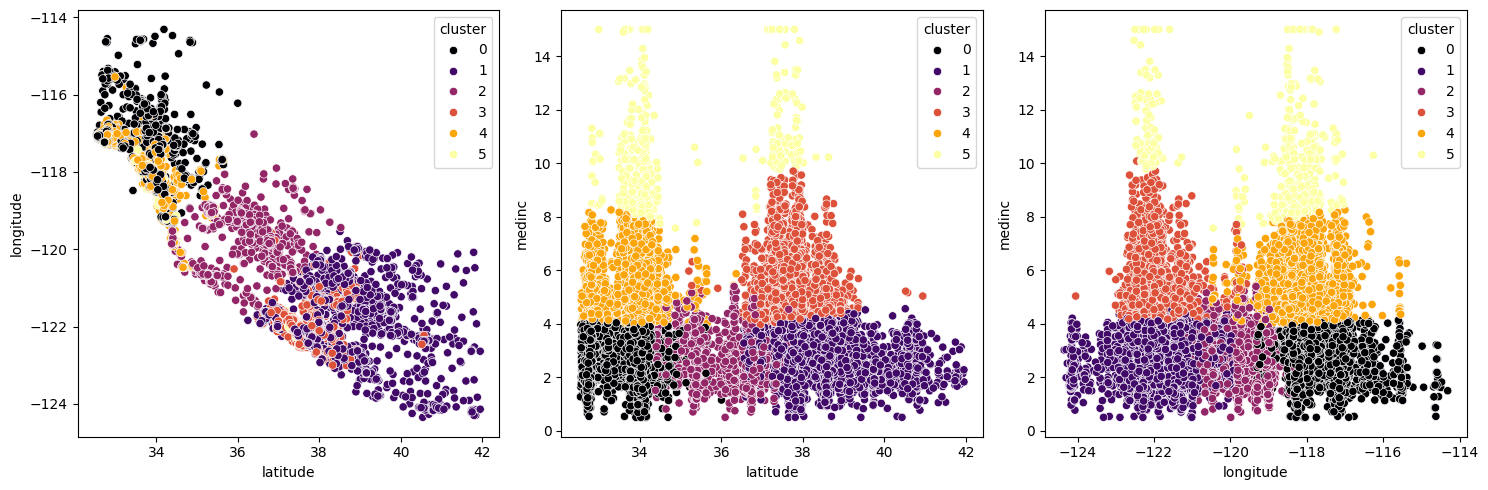

In [38]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "inferno")
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "inferno")
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "inferno")
plt.tight_layout()

plt.show()

### Paso 5: Predice con el conjunto de test

In [39]:
y_test = list(unsup_km.predict(X_test))
X_test["cluster"] = y_test

#### Visualización de las predicciones

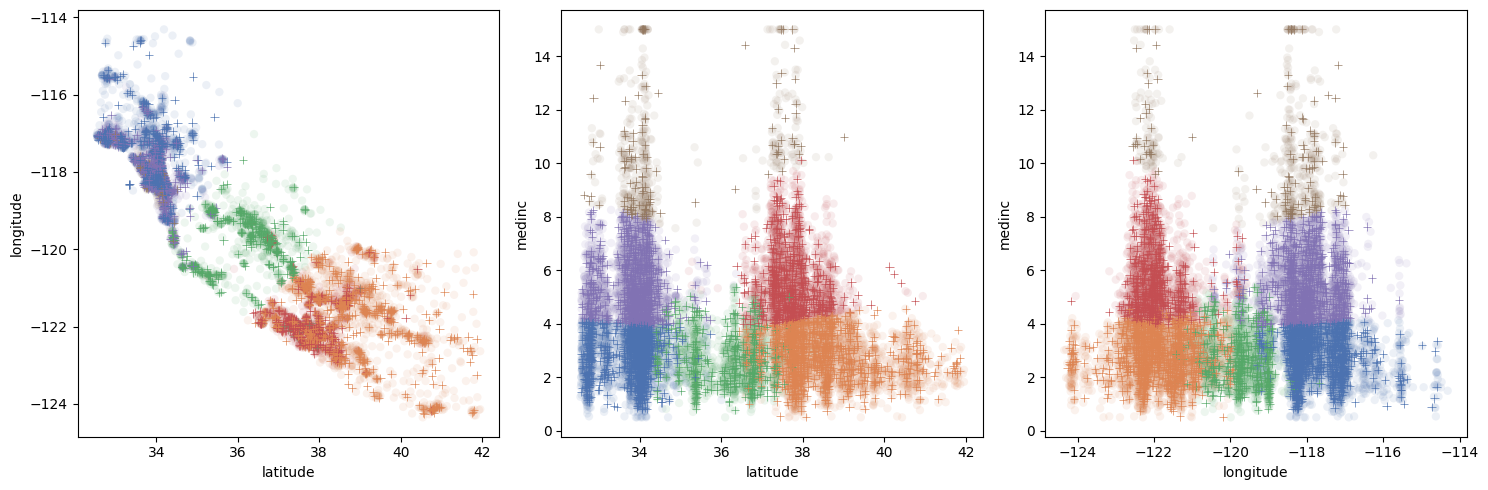

In [43]:

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "latitude", y = "longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "latitude", y = "medinc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "longitude", y = "medinc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()



### Paso 6: Entrena un modelo de clasificación supervisada

In [60]:
clf_tree = DecisionTreeClassifier(random_state = 2025)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2025)

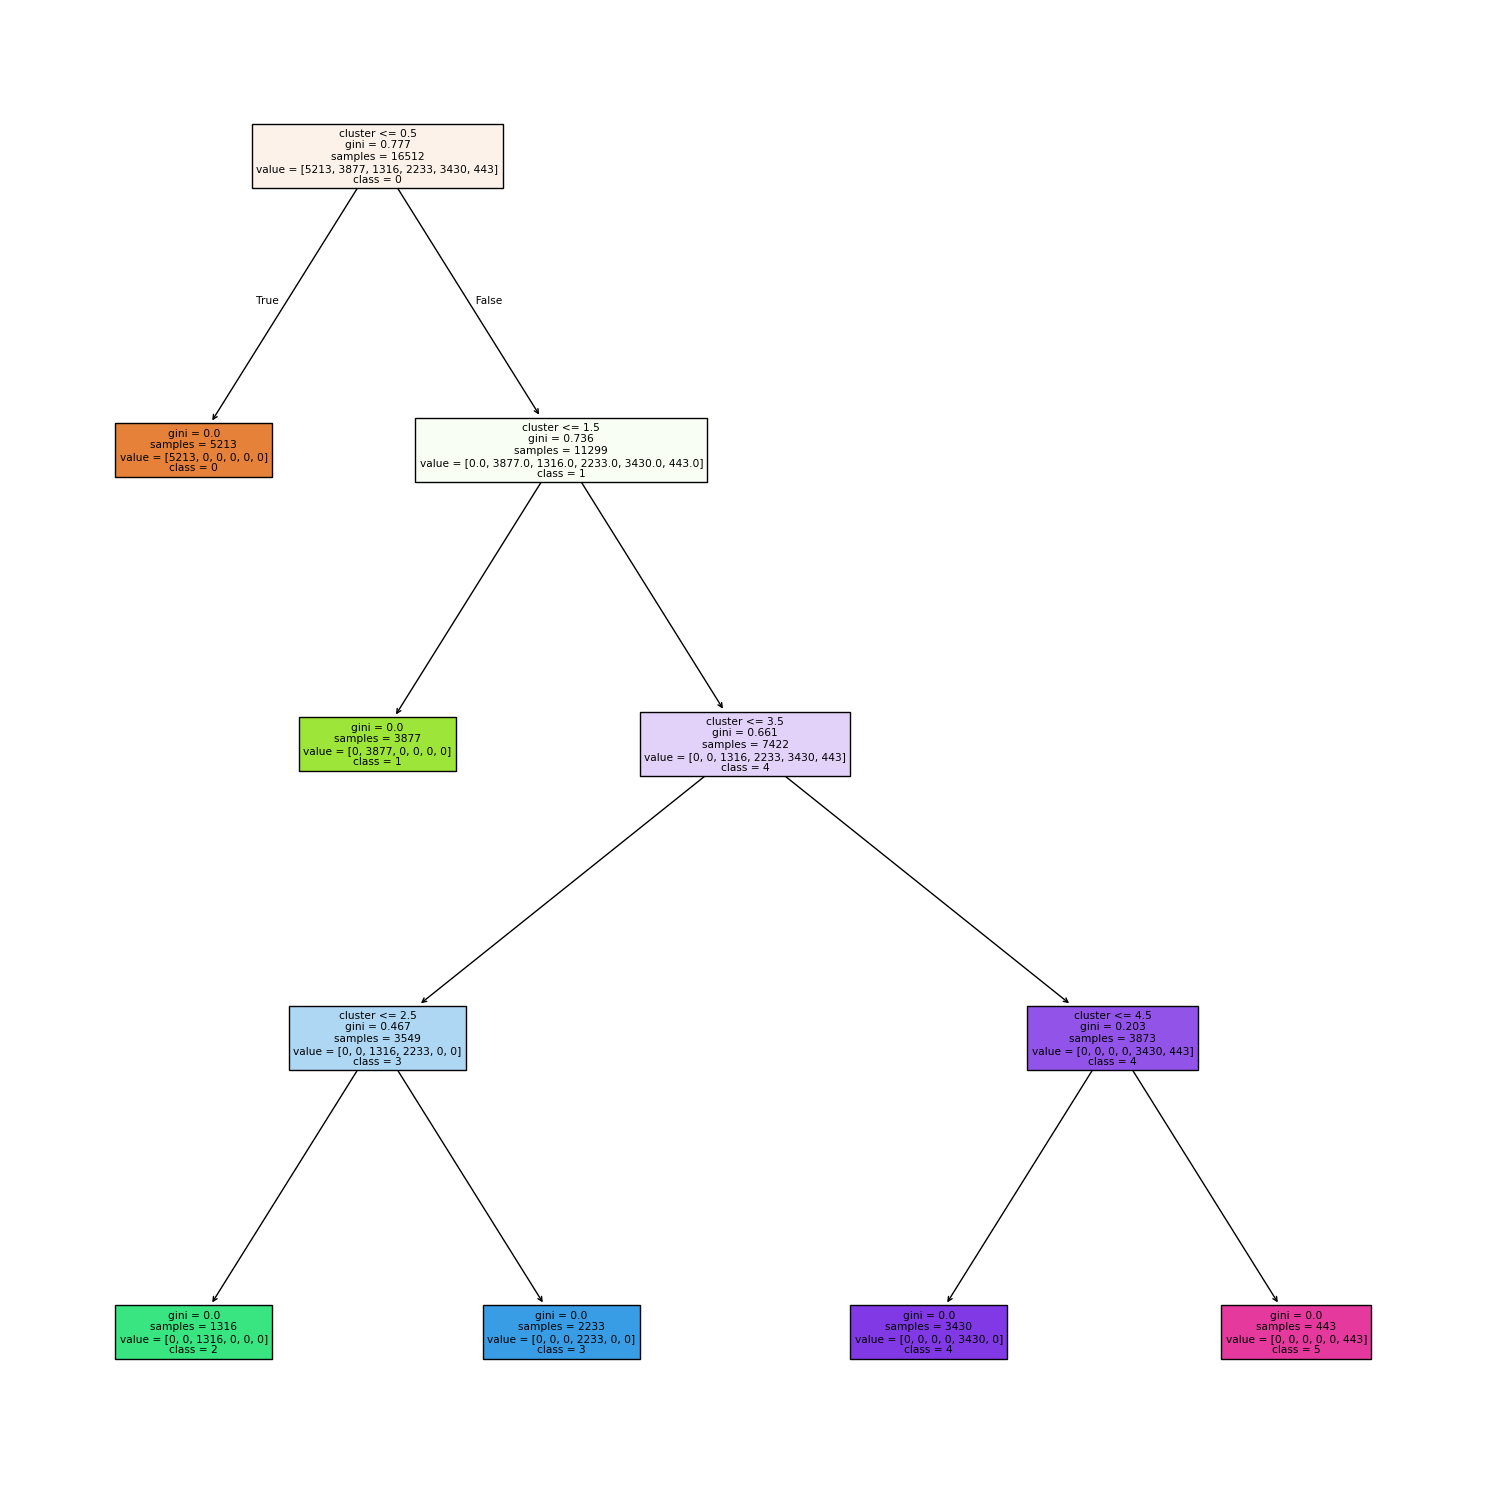

In [48]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(clf_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)
plt.tight_layout()
plt.show()

In [50]:
y_hat = clf_tree.predict(X_test)

In [54]:
accuracy_score(y_test, y_hat)

1.0

### Paso 7: Guardar los modelos

In [62]:
with open("unsup_km.pkl", "wb") as k_means01:
    pickle.dump(unsup_km, k_means01)

In [63]:
with open("clf_tree.pkl", "wb") as clf_tree02:
    pickle.dump(clf_tree, clf_tree02)